In [367]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

In [368]:
data_autos = pd.read_csv('Car details v3.csv')
print(data_autos.isna().sum())
data_autos.shape

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64


(8128, 13)

In [369]:
dict_usuarios = {"First Owner":0,"Second Owner":1,"Third Owner":2,"Fourth & Above Owner":3}
data_autos["owner"]=data_autos['owner'].map(dict_usuarios)

In [454]:
data_autos.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,0.0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,1.0,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,2.0,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,0.0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,0.0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [370]:
data_autos[data_autos['engine'].isna()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
13,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,1.0,NaN,NaN,NaN,NaN,NaN
31,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,1.0,NaN,NaN,NaN,NaN,NaN
78,Tata Indica DLS,2003,50000,70000,Diesel,Individual,Manual,0.0,NaN,NaN,NaN,NaN,NaN
87,Maruti Swift VDI BSIV W ABS,2015,475000,78000,Diesel,Dealer,Manual,0.0,NaN,NaN,NaN,NaN,NaN
119,Maruti Swift VDI BSIV,2010,300000,120000,Diesel,Individual,Manual,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846,Toyota Qualis Fleet A3,2000,200000,100000,Diesel,Individual,Manual,0.0,NaN,NaN,NaN,NaN,NaN
7996,Hyundai Santro LS zipPlus,2000,140000,50000,Petrol,Individual,Manual,1.0,NaN,NaN,NaN,NaN,NaN
8009,Hyundai Santro Xing XS eRLX Euro III,2006,145000,80000,Petrol,Individual,Manual,1.0,NaN,NaN,NaN,NaN,NaN
8068,Ford Figo Aspire Facelift,2017,580000,165000,Diesel,Individual,Manual,0.0,NaN,NaN,NaN,NaN,NaN


In [371]:
data_autos_sin_nulos = data_autos.dropna()
filtro=data_autos_sin_nulos["engine"].isna()
display(data_autos_sin_nulos.loc[filtro])
data_autos_sin_nulos.isna().sum()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats


name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [372]:
print(data_autos_sin_nulos.shape)
data_autos_sin_nulos.head()

(7901, 13)


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,0.0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,1.0,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,2.0,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,0.0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,0.0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
# Vamos a limpiar en las columnas donde hay numeros con unidades, la parte de las unidades para poder usar esas columnas como datos numericos
data = data_autos_sin_nulos

data['mileage'] = data['mileage'].apply(lambda x: float(x[:-5])) 
data['engine'].apply(lambda x: x[-3:]).value_counts()
data['engine'] = data['engine'].apply(lambda x: float(x[:-3]))
data['max_power'] = data['max_power'].apply(lambda x: float(x[:-4]))

borrar_columnas = data[['name','torque']]
data.drop(columns=borrar_columnas, inplace=True)

In [374]:
print("\ntipo de vendedor\n",data_autos_sin_nulos['seller_type'].value_counts())
print("\ntipos de combulstible\n",data_autos_sin_nulos['fuel'].value_counts())
print("\ntipo de transmision\n",data_autos_sin_nulos['transmission'].value_counts())
print("\ndueños anteriores\n",data_autos_sin_nulos['owner'].value_counts())


tipo de vendedor
 Individual          6563
Dealer              1102
Trustmark Dealer     236
Name: seller_type, dtype: int64

tipos de combulstible
 Diesel    4298
Petrol    3516
CNG         52
LPG         35
Name: fuel, dtype: int64

tipo de transmision
 Manual       6864
Automatic    1037
Name: transmission, dtype: int64

dueños anteriores
 0.0    5215
1.0    2016
2.0     510
3.0     160
Name: owner, dtype: int64


In [375]:
data = pd.get_dummies(data, drop_first = True)
data.head()

,year,selling_price,km_driven,owner,mileage,engine,max_power,seats,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Manual
0,2014,450000,145500,0.0,23.40,1248.0,74.00,5.0,1,0,0,1,0,1
1,2014,370000,120000,1.0,21.14,1498.0,103.52,5.0,1,0,0,1,0,1
2,2006,158000,140000,2.0,17.70,1497.0,78.00,5.0,0,0,1,1,0,1
3,2010,225000,127000,0.0,23.00,1396.0,90.00,5.0,1,0,0,1,0,1
4,2007,130000,120000,0.0,16.10,1298.0,88.20,5.0,0,0,1,1,0,1


In [376]:
X = data.drop(columns="selling_price")
y = data['selling_price']

In [377]:
# Están en INR (Rupia india)
# 1 USD es casi 73 INR ahora 81,59

In [378]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=5)
from sklearn.tree import DecisionTreeRegressor

In [379]:
arbol_o= DecisionTreeRegressor()
arbol_o.fit(X_train, y_train)
arbol_o.predict(X_train)

array([ 650000.,  385000.,  950000., ..., 1227000.,   80000.,  200000.])

In [380]:
print(y_train)
from sklearn.metrics import mean_squared_error

1669     650000
6314     385000
56       950000
8121     260000
7483     250000
         ...   
3143     325000
1776     459999
4202    1227000
2327      80000
3010     200000
Name: selling_price, Length: 5925, dtype: int64


In [381]:
mean_squared_error(y_train,arbol_o.predict(X_train),squared=False)

14983.898027264946

In [382]:
mean_squared_error(y_test,arbol_o.predict(X_test),squared=False)

210038.26686957412

In [408]:
arbol= DecisionTreeRegressor(max_depth=6)
arbol.fit(X_train, y_train)
arbol.predict(X_train)

array([463364.90782339, 225532.35674677, 463364.90782339, ...,
       225532.35674677, 571891.40839387, 463364.90782339])

In [409]:
y_train

2655     330000
6338     300000
5735     225000
1828    3800000
631      235000
         ...   
6666     150000
4736     480000
3881     180000
7276     675000
7637     575000
Name: selling_price, Length: 5925, dtype: int64

In [410]:
mean_squared_error(y_train,arbol.predict(X_train),squared=False)

271808.6636743847

In [411]:
mean_squared_error(y_test,arbol.predict(X_test),squared=False)

299063.31451924774

In [434]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parametros = {'n_estimators': [5,40,100], 'max_depth': [i+1 for i in range (80)] + [None]}
random = RandomForestRegressor()

modelo = GridSearchCV(random,param_grid = parametros,scoring = 'neg_mean_squared_error', cv=5)

modelo.fit(X_train, y_train)
#mean_squared_error(y_train,random.predict(X_train),squared=False)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'n_estimators': [5, 40, 100]},
             scoring='neg_mean_squared_error')

In [441]:
modelo.best_estimator_

RandomForestRegressor(max_depth=80, n_estimators=5)

In [442]:
mean_squared_error(y_train,modelo.predict(X_train),squared=False)

182716.3787898812

In [443]:
mean_squared_error(y_test,modelo.predict(X_test),squared=False)

234018.26338230298

In [436]:
pd.DataFrame(modelo.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012569,0.003101,0.002796,0.000560,1,5,"{'max_depth': 1, 'n_estimators': 5}",-2.794531e+11,-2.071272e+11,-2.137480e+11,-2.264301e+11,-2.784607e+11,-2.410438e+11,3.157295e+10,243
1,0.061161,0.000961,0.005064,0.000098,1,40,"{'max_depth': 1, 'n_estimators': 40}",-2.685261e+11,-1.908814e+11,-2.116880e+11,-2.563237e+11,-2.329810e+11,-2.320800e+11,2.839029e+10,242
2,0.152990,0.003835,0.010097,0.001231,1,100,"{'max_depth': 1, 'n_estimators': 100}",-2.643915e+11,-1.911460e+11,-2.017946e+11,-2.539263e+11,-2.329143e+11,-2.288345e+11,2.850307e+10,241
3,0.011796,0.000400,0.002548,0.000024,2,5,"{'max_depth': 2, 'n_estimators': 5}",-1.793164e+11,-1.264376e+11,-1.629822e+11,-1.883174e+11,-1.903844e+11,-1.694876e+11,2.359434e+10,238
4,0.074845,0.002434,0.005685,0.000367,2,40,"{'max_depth': 2, 'n_estimators': 40}",-1.850673e+11,-1.266623e+11,-1.603131e+11,-1.819900e+11,-1.972778e+11,-1.702621e+11,2.484558e+10,239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,0.140504,0.002983,0.011439,0.001036,80,40,"{'max_depth': 80, 'n_estimators': 40}",-1.008262e+11,-4.204428e+10,-5.015041e+10,-5.334008e+10,-6.449160e+10,-6.217051e+10,2.062606e+10,13
239,0.348613,0.004695,0.025352,0.001512,80,100,"{'max_depth': 80, 'n_estimators': 100}",-1.038362e+11,-4.157059e+10,-4.891707e+10,-5.520358e+10,-6.573955e+10,-6.305340e+10,2.187885e+10,70
240,0.020811,0.002063,0.003080,0.000082,None,5,"{'max_depth': None, 'n_estimators': 5}",-9.756895e+10,-4.539818e+10,-5.175089e+10,-6.871476e+10,-6.851893e+10,-6.639034e+10,1.809433e+10,175
241,0.144361,0.003928,0.011209,0.000248,None,40,"{'max_depth': None, 'n_estimators': 40}",-1.023934e+11,-4.151693e+10,-5.064498e+10,-5.400322e+10,-6.381719e+10,-6.247515e+10,2.119549e+10,23


In [ ]:
m

In [389]:
mean_squared_error(y_test,random.predict(X_test),squared=False)

198789.93539549058

In [390]:
data_autos.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,0.0,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,1.0,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,2.0,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,0.0,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,0.0,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [391]:
data_autos.head().isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [392]:
patron = '\d+(\.?,?\d+)?'
regex = re.compile(patron, flags=re.IGNORECASE)
data_autos['torque'].apply(lambda x: regex.findall(str(x)))
data_autos['torque'].apply(lambda x:str(x))

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2           12.7@ 2,700(kgm@ rpm)
3        22.4 kgm at 1750-2750rpm
4           11.5@ 4,500(kgm@ rpm)
                  ...            
8123             113.7Nm@ 4000rpm
8124    24@ 1,900-2,750(kgm@ rpm)
8125               190Nm@ 2000rpm
8126          140Nm@ 1800-3000rpm
8127          140Nm@ 1800-3000rpm
Name: torque, Length: 8128, dtype: object

In [393]:
regex.findall('12.7@ 2,700(kgm@ rpm)')

['.7', ',700']

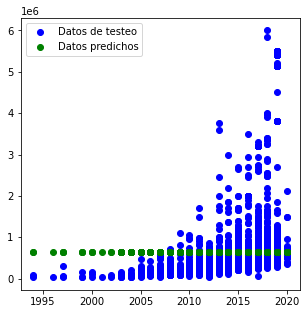

El R cuadrado para este ajuste dio: 0.0011924559516524047


In [444]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


x=data.loc[:,["year"]]
y=data["selling_price"]

x_train, x_test, y_train, y_test = train_test_split(x,y)

modelo = LinearRegression(fit_intercept=False)
modelo.fit(x_train,y_train)

plt.figure(figsize = (5,5))
plt.scatter(x_test, y_test, color = 'b', label = 'Datos de testeo')
y_pred = modelo.predict(x_test)
plt.scatter(x_test, y_pred, color = 'g', label = 'Datos predichos')
plt.legend()
plt.show()
r2 = r2_score(y_test,y_pred)
print (f'El R cuadrado para este ajuste dio: {r2}')

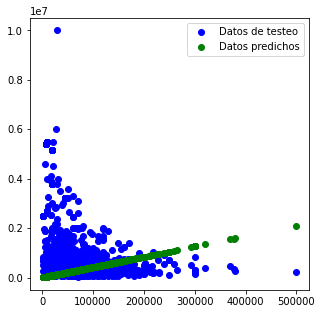

El R cuadrado para este ajuste dio: -0.37951583646027864


In [445]:
x=data.loc[:,["km_driven"]]

x_train, x_test, y_train, y_test = train_test_split(x,y)

modelo = LinearRegression(fit_intercept=False)
modelo.fit(x_train,y_train)

plt.figure(figsize = (5,5))
plt.scatter(x_test, y_test, color = 'b', label = 'Datos de testeo')
y_pred = modelo.predict(x_test)
plt.scatter(x_test, y_pred, color = 'g', label = 'Datos predichos')
plt.legend()
plt.show()
r2 = r2_score(y_test,y_pred)
print (f'El R cuadrado para este ajuste dio: {r2}')

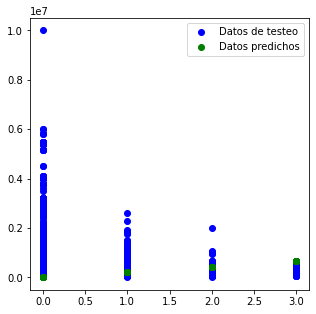

El R cuadrado para este ajuste dio: -0.5635857009135461


In [448]:
x=data.loc[:,["owner"]]

x_train, x_test, y_train, y_test = train_test_split(x,y)

modelo = LinearRegression(fit_intercept=False)
modelo.fit(x_train,y_train)

plt.figure(figsize = (5,5))
plt.scatter(x_test, y_test, color = 'b', label = 'Datos de testeo')
y_pred = modelo.predict(x_test)
plt.scatter(x_test, y_pred, color = 'g', label = 'Datos predichos')
plt.legend()
plt.show()
r2 = r2_score(y_test,y_pred)
print (f'El R cuadrado para este ajuste dio: {r2}')

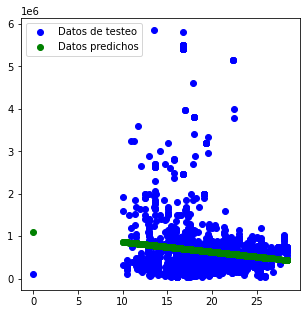

El R cuadrado para este ajuste dio: 0.022355209740558157


In [449]:
x=data.loc[:,["mileage"]]

x_train, x_test, y_train, y_test = train_test_split(x,y)

modelo = LinearRegression(fit_intercept=True)
modelo.fit(x_train,y_train)

plt.figure(figsize = (5,5))
plt.scatter(x_test, y_test, color = 'b', label = 'Datos de testeo')
y_pred = modelo.predict(x_test)
plt.scatter(x_test, y_pred, color = 'g', label = 'Datos predichos')
plt.legend()
plt.show()
r2 = r2_score(y_test,y_pred)
print (f'El R cuadrado para este ajuste dio: {r2}')

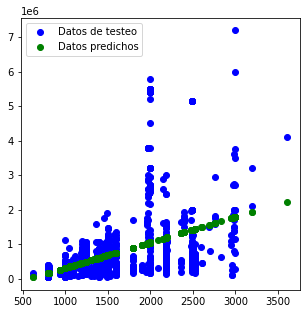

El R cuadrado para este ajuste dio: 0.210117124551089


In [450]:
x=data.loc[:,["engine"]]

x_train, x_test, y_train, y_test = train_test_split(x,y)

modelo = LinearRegression(fit_intercept=True)
modelo.fit(x_train,y_train)

plt.figure(figsize = (5,5))
plt.scatter(x_test, y_test, color = 'b', label = 'Datos de testeo')
y_pred = modelo.predict(x_test)
plt.scatter(x_test, y_pred, color = 'g', label = 'Datos predichos')
plt.legend()
plt.show()
r2 = r2_score(y_test,y_pred)
print (f'El R cuadrado para este ajuste dio: {r2}')

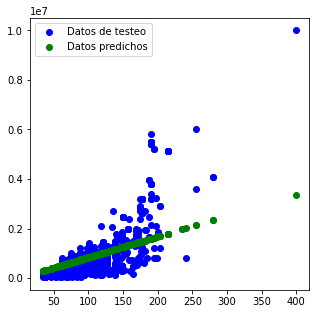

El R cuadrado para este ajuste dio: 0.40027213713319765


In [451]:
x=data.loc[:,["max_power"]]

x_train, x_test, y_train, y_test = train_test_split(x,y)

modelo = LinearRegression(fit_intercept=False)
modelo.fit(x_train,y_train)

plt.figure(figsize = (5,5))
plt.scatter(x_test, y_test, color = 'b', label = 'Datos de testeo')
y_pred = modelo.predict(x_test)
plt.scatter(x_test, y_pred, color = 'g', label = 'Datos predichos')
plt.legend()
plt.show()
r2 = r2_score(y_test,y_pred)
print (f'El R cuadrado para este ajuste dio: {r2}')

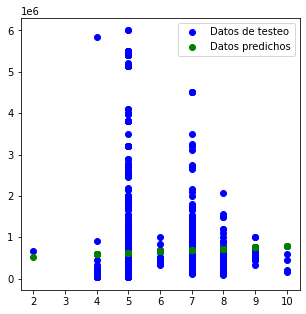

El R cuadrado para este ajuste dio: 0.0026556663624133225


In [452]:
x=data.loc[:,["seats"]]

x_train, x_test, y_train, y_test = train_test_split(x,y)

modelo = LinearRegression(fit_intercept=True)
modelo.fit(x_train,y_train)

plt.figure(figsize = (5,5))
plt.scatter(x_test, y_test, color = 'b', label = 'Datos de testeo')
y_pred = modelo.predict(x_test)
plt.scatter(x_test, y_pred, color = 'g', label = 'Datos predichos')
plt.legend()
plt.show()
r2 = r2_score(y_test,y_pred)
print (f'El R cuadrado para este ajuste dio: {r2}')

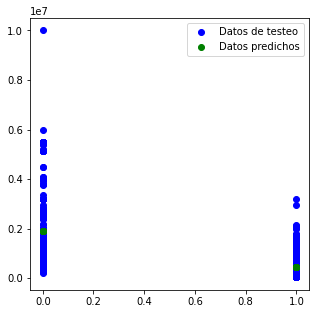

El R cuadrado para este ajuste dio: 0.33197342171444744


In [453]:
x=data.loc[:,["transmission_Manual"]]

x_train, x_test, y_train, y_test = train_test_split(x,y)

modelo = LinearRegression(fit_intercept=True)
modelo.fit(x_train,y_train)

plt.figure(figsize = (5,5))
plt.scatter(x_test, y_test, color = 'b', label = 'Datos de testeo')
y_pred = modelo.predict(x_test)
plt.scatter(x_test, y_pred, color = 'g', label = 'Datos predichos')
plt.legend()
plt.show()
r2 = r2_score(y_test,y_pred)
print (f'El R cuadrado para este ajuste dio: {r2}')

In [402]:
data_menos_columnas=data[["engine",'max_power','transmission_Manual','selling_price']]
X=data_menos_columnas.drop(columns='selling_price')
y=data['selling_price']

In [403]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
arbol= DecisionTreeRegressor(max_depth=6)
arbol.fit(X_train, y_train)
arbol.predict(X_train)

array([463364.90782339, 225532.35674677, 463364.90782339, ...,
       225532.35674677, 571891.40839387, 463364.90782339])

In [404]:
y_train

2655     330000
6338     300000
5735     225000
1828    3800000
631      235000
         ...   
6666     150000
4736     480000
3881     180000
7276     675000
7637     575000
Name: selling_price, Length: 5925, dtype: int64

In [405]:
mean_squared_error(y_train,arbol.predict(X_train),squared=False)

271808.6636743847

In [406]:
random = RandomForestRegressor(n_estimators=100,max_depth=3,max_features=2)
random.fit(X_train, y_train)
mean_squared_error(y_train,random.predict(X_train),squared=False)

358973.9617719031

In [407]:
mean_squared_error(y_test,random.predict(X_test),squared=False)

394262.0759030578